In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("D:/project datasets/33_Constituency_Wise_Detailed_Result.csv")

# Preview data
print("Initial Shape:", df.shape)
print("Columns:", df.columns)



# Step 2: Remove duplicates
df.drop_duplicates(inplace=True)

# Step 3: Handle missing values
# Drop rows where all values are NaN
df.dropna(how='all', inplace=True)

print(df.info())
print(df.head())


Initial Shape: (8901, 17)
#Columns in the dataset
Columns: Index(['State Name', 'PC Name', 'Candidate Name', 'Gender', 'Age', 'Category',
       'Party Name', 'Party Symbol', 'Total Votes Polled In The Constituency',
       'Valid Votes', 'Votes Secured - General', 'Votes Secured - Postal',
       'Votes Secured - Total',
       '% of Votes Secured - Over Total Electors In Constituency',
       '% of Votes Secured - Over Total Votes Polled In Constituency',
       'Over Total Valid Votes Polled In Constituency', 'Total Electors'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901 entries, 0 to 8900
Data columns (total 17 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   State Name                                                    8901 non-null   object 
 1   PC Name                                                 

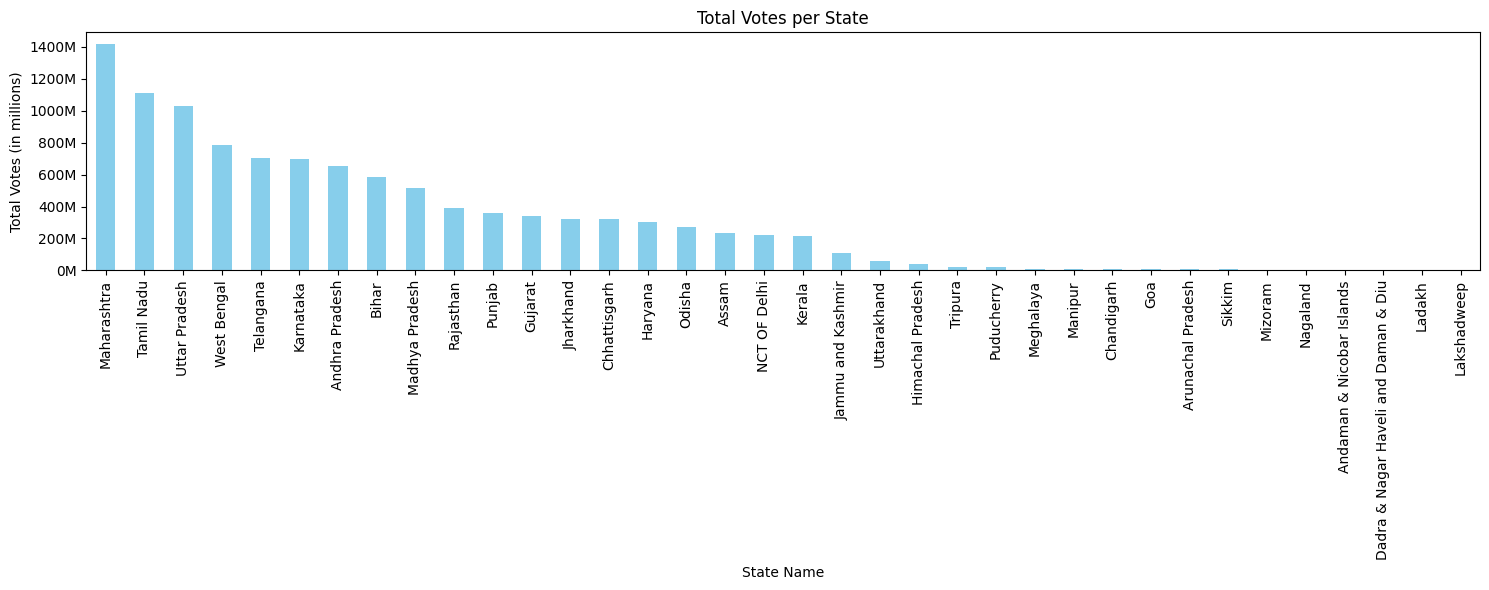

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as ticker
df = pd.read_csv("D:/project datasets/33_Constituency_Wise_Detailed_Result.csv")
# Grouping by State
state_votes = df.groupby('State Name')['Total Votes Polled In The Constituency'].sum().sort_values(ascending=False)


plt.figure(figsize=(15, 6))
state_votes.plot(kind='bar', color='skyblue')
plt.title('Total Votes per State')
plt.ylabel('Total Votes (in millions)')
plt.xticks(rotation=90)


formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()





C:\Users\HARJOT\AppData\Local\Temp\ipykernel_7620\2431559470.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Total_Votes_Millions'] = (top_10['Total_Votes_Secured'] / 1_000_000).round(2)


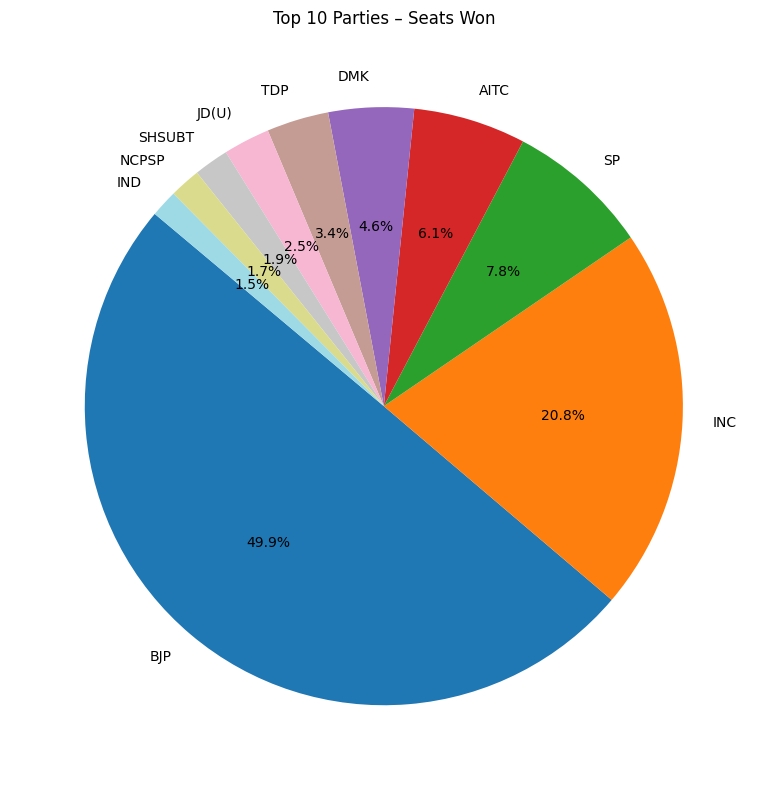

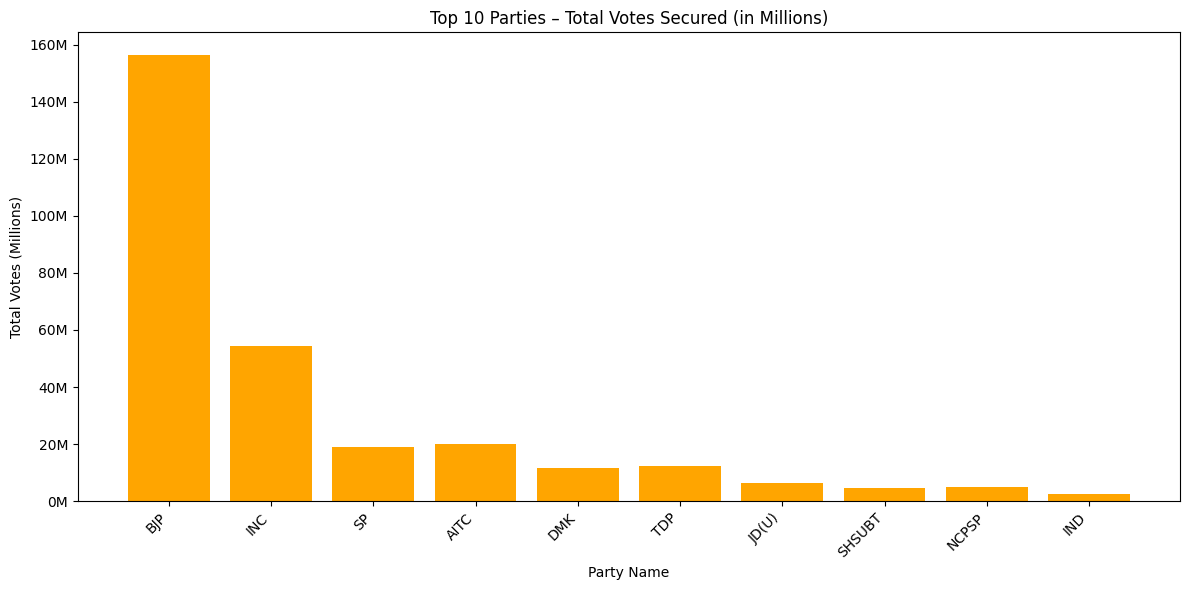

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Standardize column names
df.columns = df.columns.str.strip().str.lower()


winners = df.loc[df.groupby('pc name')['votes secured - total'].idxmax()]

# Group by Party Name to get seats and total votes
party_summary = winners.groupby('party name').agg(
    Seats_Won=('pc name', 'count'),
    Total_Votes_Secured=('votes secured - total', 'sum')
).sort_values(by='Seats_Won', ascending=False)

# Keep only top 10 parties
top_10 = party_summary.head(10)

# Convert total votes to millions
top_10['Total_Votes_Millions'] = (top_10['Total_Votes_Secured'] / 1_000_000).round(2)

# Pie Chart for Seats Won
plt.figure(figsize=(8, 8))
top_10['Seats_Won'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Top 10 Parties – Seats Won')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Bar Chart for Total Votes in Millions
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10.index, top_10['Total_Votes_Millions'], color='orange')
plt.title('Top 10 Parties – Total Votes Secured (in Millions)')
plt.xlabel('Party Name')
plt.ylabel('Total Votes (Millions)')

# Format Y-axis to show values like 10M, 20M
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Index(['state name', 'pc name', 'candidate name', 'gender', 'age', 'category',
       'party name', 'party symbol', 'total votes polled in the constituency',
       'valid votes', 'votes secured - general', 'votes secured - postal',
       'votes secured - total',
       '% of votes secured - over total electors in constituency',
       '% of votes secured - over total votes polled in constituency',
       'over total valid votes polled in constituency', 'total electors'],
      dtype='object')


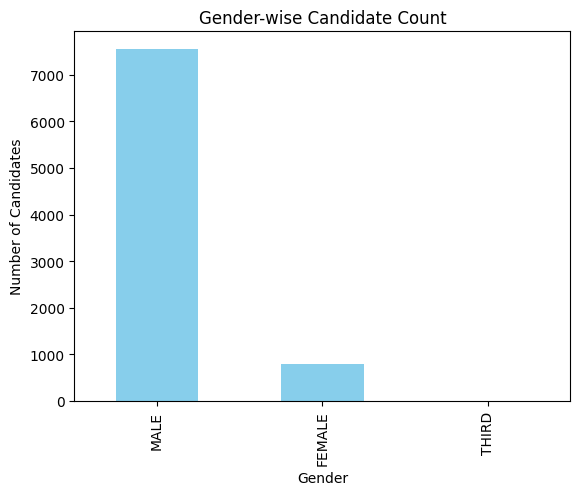

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

print(df.columns)


df.columns = df.columns.str.lower()

# Count gender values
gender_counts = df['gender'].value_counts()

# Plot bar chart
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender-wise Candidate Count')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.show()


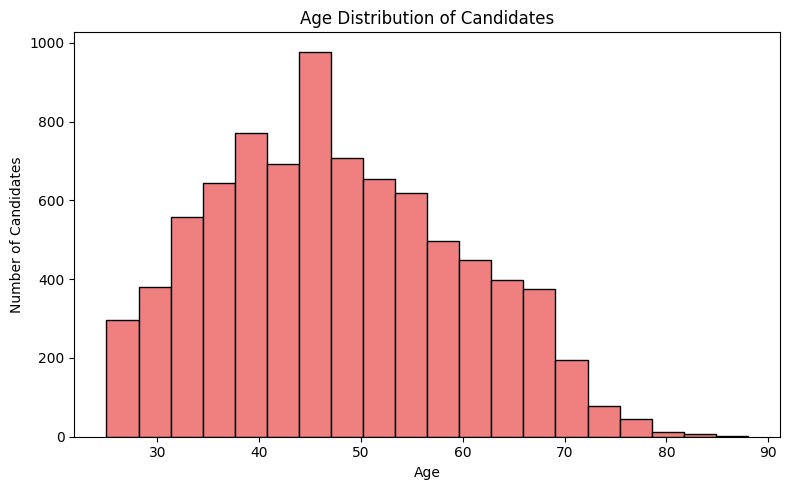

In [58]:
# Plot histogram of Age
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Age Distribution of Candidates')
plt.xlabel('Age')
plt.ylabel('Number of Candidates')
plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

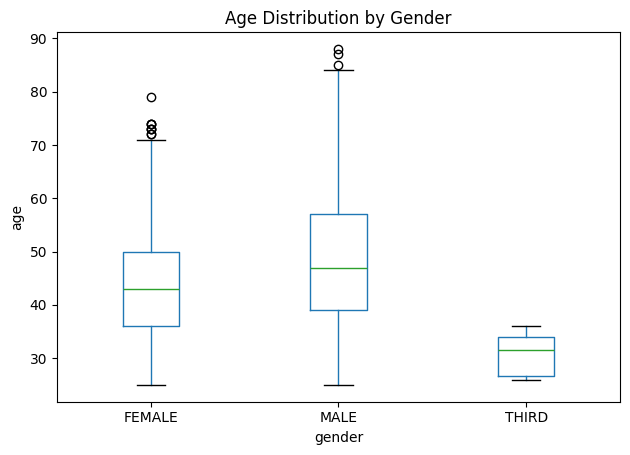

In [59]:
# Box plot to show age spread by gender
plt.figure(figsize=(7, 5))
df.boxplot(column='age', by='gender', grid=False)
plt.title('Age Distribution by Gender')
plt.suptitle("")  # Remove default title
plt.xlabel('gender')
plt.ylabel('age')
plt.tight_layout()
plt.show()


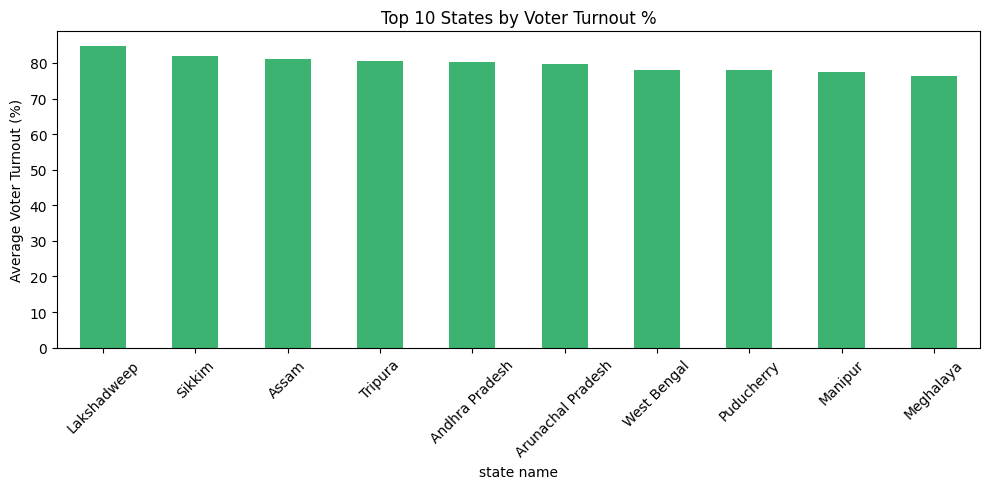

🔼 Top 10 Constituencies by Voter Turnout:
pc name
Dhubri         91.539223
Ongole         87.270807
Narsaraopet    85.727599
Chittoor       85.597894
Bapatla        85.166860
Bishnupur      85.001771
Kanthi         84.713722
Lakshadweep    84.666885
Tamluk         84.659832
Nagaon         84.458186
Name: Voter Turnout %, dtype: float64

🔽 Bottom 10 Constituencies by Voter Turnout:
pc name
SRINAGAR        38.268690
Nawada          42.644579
Patna Sahib     46.609646
Almora          47.607627
Hyderabad       48.591330
Phulpur         48.725052
REWA            49.003651
Nalanda         49.048341
Mathura         49.119089
Secunderabad    49.161444
Name: Voter Turnout %, dtype: float64


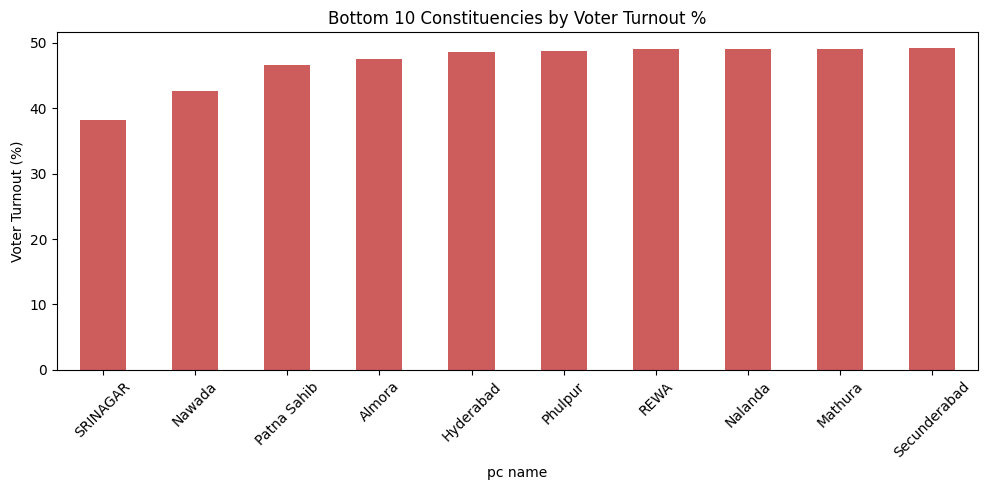

In [60]:

df['Voter Turnout %'] = (df['valid votes'] / df['total electors']) * 100
# Group by State Name and get average voter turnout
state_turnout = df.groupby('state name')['Voter Turnout %'].mean().sort_values(ascending=False)

# Plot top 10 states with highest turnout
plt.figure(figsize=(10, 5))
state_turnout.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 States by Voter Turnout %')
plt.ylabel('Average Voter Turnout (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Group by constituency
const_turnout = df.groupby('pc name')['Voter Turnout %'].mean()

# Top 10 highest turnout constituencies
print("🔼 Top 10 Constituencies by Voter Turnout:")
print(const_turnout.sort_values(ascending=False).head(10))

# Bottom 10 lowest turnout constituencies
print("\n🔽 Bottom 10 Constituencies by Voter Turnout:")
print(const_turnout.sort_values().head(10))
plt.figure(figsize=(10, 5))
const_turnout.sort_values().head(10).plot(kind='bar', color='indianred')
plt.title('Bottom 10 Constituencies by Voter Turnout %')
plt.ylabel('Voter Turnout (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


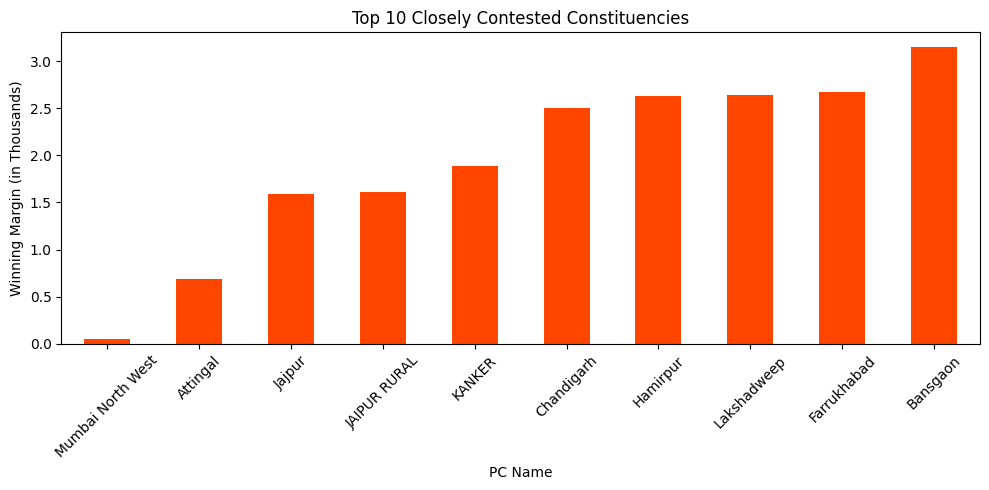

In [61]:

df_sorted = df.sort_values(['pc name', 'votes secured - total'], ascending=[True, False])


top2 = df_sorted.groupby('pc name').head(2).copy()


top2['Rank'] = top2.groupby('pc name')['votes secured - total'].rank(method='first', ascending=False).astype(int)


pivot = top2.pivot(index='pc name', columns='Rank', values='votes secured - total')


pivot.columns = ['Winner Votes', 'Runner-Up Votes']
pivot = pivot[['Winner Votes', 'Runner-Up Votes']]


pivot['Winning Margin'] = (pivot['Winner Votes'] - pivot['Runner-Up Votes']).abs()


pivot['Winning Margin (K)'] = pivot['Winning Margin'] / 1e3


pivot_sorted = pivot.sort_values(by='Winning Margin (K)')


plt.figure(figsize=(10, 5))
pivot_sorted['Winning Margin (K)'].head(10).plot(kind='bar', color='orangered')
plt.title('Top 10 Closely Contested Constituencies')
plt.ylabel('Winning Margin (in Thousands)')
plt.xlabel('PC Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


pivot_sorted.to_csv("Winning_Margins_By_Constituency.csv")


['state name', 'pc name', 'candidate name', 'gender', 'age', 'category', 'party name', 'party symbol', 'total votes polled in the constituency', 'valid votes', 'votes secured - general', 'votes secured - postal', 'votes secured - total', '% of votes secured - over total electors in constituency', '% of votes secured - over total votes polled in constituency', 'over total valid votes polled in constituency', 'total electors', 'Voter Turnout %']


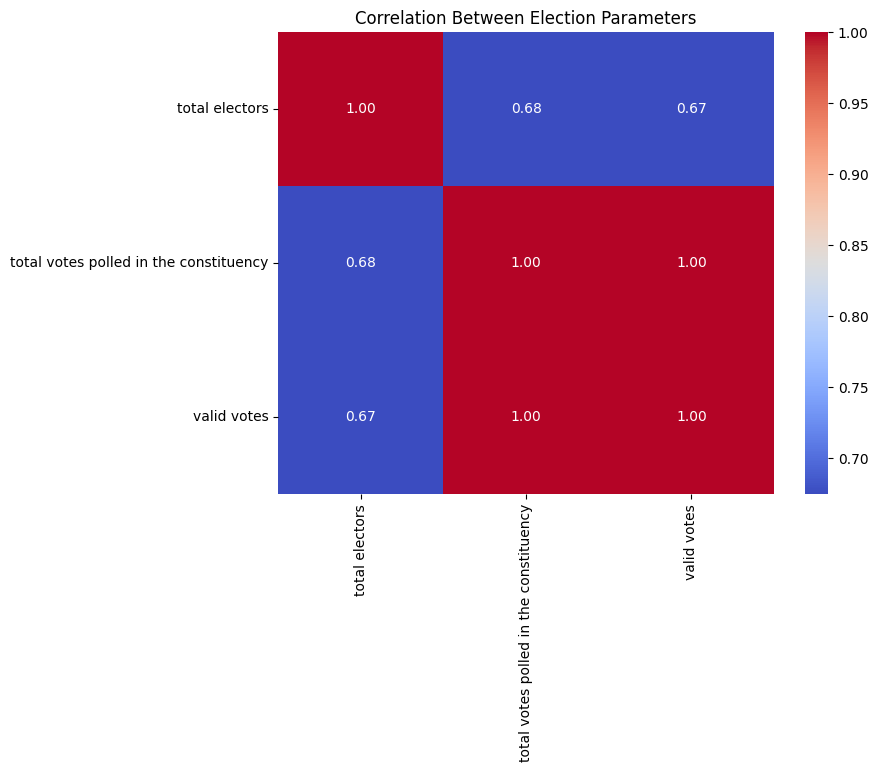

In [62]:

df.columns = df.columns.str.strip().str.replace('\xa0', ' ', regex=False).str.replace('–', '-', regex=False)


print(df.columns.tolist())


columns_of_interest = ['total electors', 'total votes polled in the constituency', 'valid votes']  

# Step 4: Perform correlation
df_corr = df[columns_of_interest].copy()
df_corr.dropna(inplace=True)

# Step 5: Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Election Parameters")
plt.show()

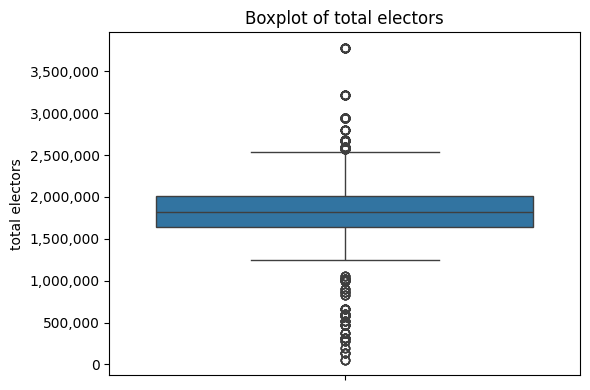

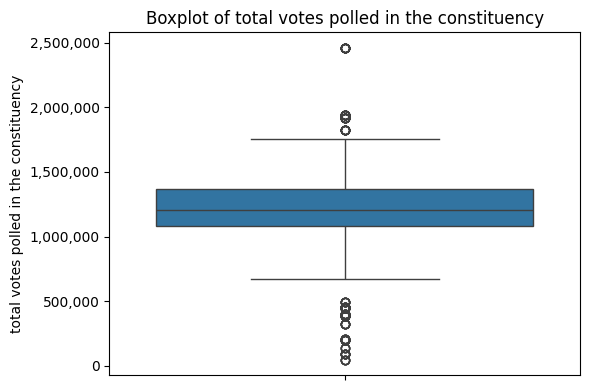

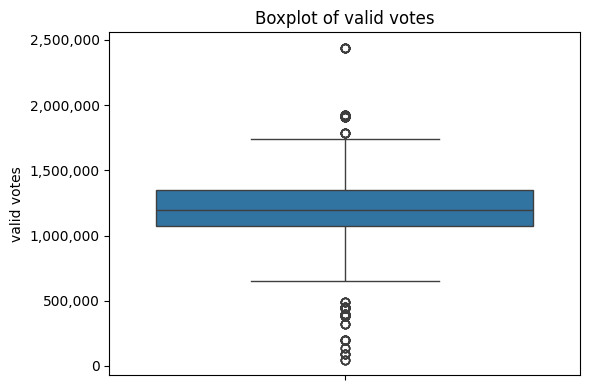

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # <-- NEW

# List of columns to check
columns = ['total electors', 'total votes polled in the constituency', 'valid votes']

# Plot boxplots for each column
for col in columns:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    
    # Format y-axis with commas
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

    plt.tight_layout()
    plt.show()


In [65]:
from scipy.stats import zscore
import numpy as np
columns = ['age', 'total votes polled in the constituency']  

# Compute Z-scores for selected columns
df_zscore = df[columns].apply(zscore)

# Set a Z-score threshold (usually ±3)
threshold = 3


outliers = df[(np.abs(df_zscore) > threshold).any(axis=1)]


print("Outliers detected using Z-score:")
print(outliers)


Outliers detected using Z-score:
             state name         pc name   candidate name  gender   age  \
479   Arunachal Pradesh  Arunachal West     KIREN RIJIJU    MALE  53.0   
480   Arunachal Pradesh  Arunachal West       NABAM TUKI    MALE  56.0   
481   Arunachal Pradesh  Arunachal West       TECHI RANA    MALE  28.0   
482   Arunachal Pradesh  Arunachal West     TOKO SHEETAL  FEMALE  43.0   
483   Arunachal Pradesh  Arunachal West      BIMPAK SIGA    MALE  41.0   
...                 ...             ...              ...     ...   ...   
8764        Lakshadweep     Lakshadweep             KOYA    MALE  66.0   
8897             Ladakh          Ladakh   MOHMAD HANEEFA    MALE  55.0   
8898             Ladakh          Ladakh  TSERING NAMGYAL    MALE  51.0   
8899             Ladakh          Ladakh    TASHI GYALSON    MALE  48.0   
8900             Ladakh          Ladakh             NOTA     NaN   NaN   

     category party name        party symbol  \
479        ST        BJP      